In [93]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_df = pd.merge(ride_df, city_df, on="city")

# Display the data table for preview
pyber_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

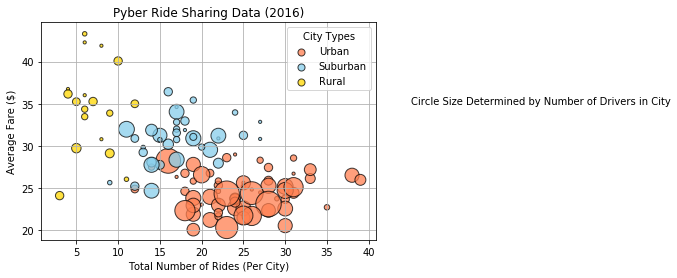

In [140]:
# Obtain the x and y coordinates for each of the three city types

#number of rides in city on the type

cityrides = pyber_df.groupby(["type",'city']).count()['fare']
averagefare = pyber_df.groupby(['type',"city"]).mean()['fare']
averagefare
drivercount = pyber_df.groupby(['type',"city"]).mean()['driver_count']

# Build the scatter plots for each city types

urban = plt.scatter(cityrides['Urban'], averagefare['Urban'], marker='o', facecolor='coral', edgecolor='black', s=drivercount*10, alpha=.75)
suburban = plt.scatter(cityrides['Suburban'], averagefare['Suburban'], marker='o', facecolor='skyblue', edgecolor='black', s=drivercount*10, alpha=.75)
rural = plt.scatter(cityrides['Rural'], averagefare['Rural'], marker='o', facecolor='gold', edgecolor='black', s=drivercount*10, alpha=.75)

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')

# Create a legend
legend = plt.legend([urban, suburban, rural],["Urban", "Suburban", "Rural"], title="City Types", loc="best")
legend.legendHandles[0]._sizes = [50]
legend.legendHandles[1]._sizes = [50]
legend.legendHandles[2]._sizes = [50]
# Incorporate a text label regarding circle size
plt.text(45,35,"Circle Size Determined by Number of Drivers in City")
# Save Figure
plt.savefig("../Images/PyberRideSharingData.png")
# Show plot
plt.show()

## Total Fares by City Type

Text(0.5, 1.0, '% of Total Fares by City Type')

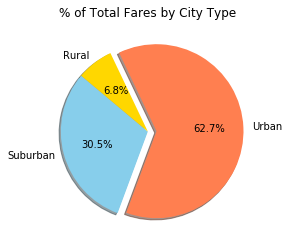

In [95]:
# Calculate Type Percents
###Total Fare###
totalfare_data = pyber_df.groupby(["type",'city']).sum()['fare']
totalfare = totalfare_data.sum()
totalfare
###Suburban Fare###
suburanfare = totalfare_data['Suburban'].sum()
suburanfareP = suburanfare/totalfare
subranfareP
###Urban Fare###
urbanfare = totalfare_data['Urban'].sum()
urbanfareP = urbanfare/totalfare
urbanfareP
###Rural Fare###
ruralfare = totalfare_data['Rural'].sum()
ruralfareP = ruralfare/totalfare
ruralfareP
# Build Pie Chart
labels = ["Suburban","Urban", "Rural"]
explode = (0,.1,0)
sizes = [suburanfare, urbanfare, ruralfare]
colors = ["skyblue", "coral", "gold"]
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True,startangle=140)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("../Images/TotalFaresbyCityType.png")
# Show Figure
plt.show()

## Total Rides by City Type

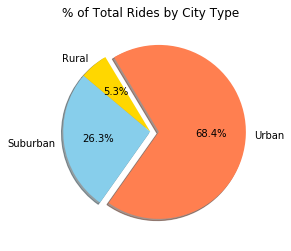

In [142]:
# Calculate Ride Percents
##City Totals##
totalcity = pyber_df.groupby(["type"]).count()['city']
totalcity
###Suburban City###
suburbancity = totalcity['Suburban']
suburbancityP = suburbancity/totalcity
###Urban City###
urbancity = totalcity['Urban']
urbancityP = urbancity/totalcity
###Rural City####
ruralcity = totalcity['Rural']
ruralcityP = ruralcity/totalcity
# Build Pie Chart
citylabels = ["Suburban","Urban", "Rural"]
cityexplode = (0,.1,0)
citysizes = [suburbancity, urbancity, ruralcity]
citycolors = ["skyblue", "coral", "gold"]
plt.pie(citysizes, explode=cityexplode, labels=citylabels, colors=citycolors, autopct="%1.1f%%", shadow=True,startangle=140)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("../Images/TotalRidesbyCityType")
# Show Figure
plt.show()

## Total Drivers by City Type

Text(0.5, 1.0, '% of Total Drivers by City Type')

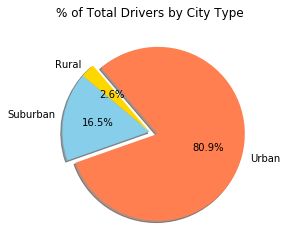

In [136]:
# Calculate Driver Percents
###Total Drivers###
totaldriver_data = pyber_df.groupby(["type","city"]).mean()['driver_count']
totaldriver = totaldriver_data.sum()
totaldriver
###Suburban Drivers###
suburbandriver = totaldriver_data['Suburban'].sum()
suburbandriver
suburbandriverP = suburbandriver/totaldriver
suburbandriverP
###Urban Driver###
urbandriver = totaldriver_data['Urban'].sum()
urbandriver
urbandriverP = urbandriver/totaldriver
urbandriverP
###Rural Driver###
ruraldriver = totaldriver_data['Rural'].sum()
ruraldriver
ruraldriverP = ruraldriver/totaldriver
ruraldriverP
# Build Pie Charts
driverlabels = ["Suburban","Urban", "Rural"]
driverexplode = (0,.1,0)
driversizes = [suburbandriver, urbandriver, ruraldriver]
drivercolors = ["skyblue", "coral", "gold"]
plt.pie(driversizes, explode=driverexplode, labels=driverlabels, colors=drivercolors, autopct="%1.1f%%", shadow=True,startangle=140)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("../Images/TotalDriversbyCityType.png")
# Show Figure
plt.show()

In [ ]:
# # plt.scatter(x_axis, city_rides, marker="o", facecolors="red", edgecolors="black",
# #             s=city_rides, alpha=0.75)


# plt.scatter(x_axis, pyber_df.groupby("type"), marker="o", facecolors="red", edgecolors="black",
#             s=x_axis, alpha=0.75)


# pyber_df.plot.scatter(cityrides,averagefare,c="r")


# urban_scatter = plt.scatter(cityrides.loc['type',['Urban']], averagefare, marker="o",facecolors="red", edgecolors="black",
#            s=40, alpha=.75)



# plt.scatter(cityrides, averagefare, marker="o",facecolors="red", edgecolors="black",
#            s=40, alpha=.75)
# plt.show()

In [110]:
# totaldriver_data = pyber_df.groupby(["type"]).nunique()['driver_count']
# totaldriver_data

# totaldriver_data = pyber_df.groupby(["type","city"]).mean()['driver_count']
# totaldriver = totaldriver_data.sum()
# totaldriver


# finddd = pyber_df.groupby(['type'])
# finddd['city']['driver_count'].head()

type
Rural        7
Suburban    18
Urban       45
Name: driver_count, dtype: int64